In [ ]:
from google.colab import files

uploaded = files.upload()

Saving combined_cleaned_train.csv to combined_cleaned_train.csv


In [ ]:
import pandas as pd

combined_train = pd.read_csv("combined_cleaned_train.csv")

In [ ]:
combined_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10002428,38875437,2156-04-21 18:00:00,220045,Heart Rate,0.544118,1
1,10002428,38875437,2156-04-21 18:00:00,220050,Arterial Blood Pressure systolic,0.431535,1
2,10002428,38875437,2156-04-21 18:00:00,220051,Arterial Blood Pressure diastolic,0.275000,1
3,10002428,38875437,2156-04-21 18:00:00,220052,Arterial Blood Pressure mean,0.360000,1
4,10002428,38875437,2156-04-21 18:00:00,220210,Respiratory Rate,0.440000,1


In [ ]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186959 entries, 0 to 1186958
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   subject_id           1186959 non-null  int64  
 1   stay_id              1186959 non-null  int64  
 2   charttime            1186959 non-null  object 
 3   itemid               1186959 non-null  int64  
 4   label                1186959 non-null  object 
 5   valuenum_normalized  1186959 non-null  float64
 6   ext_success          1186959 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 63.4+ MB


In [ ]:
uploaded = files.upload()

Saving combined_cleaned_test.csv to combined_cleaned_test.csv


In [ ]:
combined_test = pd.read_csv("combined_cleaned_test.csv")

In [ ]:
combined_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10004733,39635619,2174-12-06 17:00:00,220045,Heart Rate,0.382353,1
1,10004733,39635619,2174-12-06 17:00:00,220179,Non Invasive Blood Pressure systolic,0.452675,1
2,10004733,39635619,2174-12-06 17:00:00,220180,Non Invasive Blood Pressure diastolic,0.359281,1
3,10004733,39635619,2174-12-06 17:00:00,220181,Non Invasive Blood Pressure mean,0.329609,1
4,10004733,39635619,2174-12-06 17:00:00,220210,Respiratory Rate,0.200000,1


In [ ]:
combined_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301714 entries, 0 to 301713
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   subject_id           301714 non-null  int64  
 1   stay_id              301714 non-null  int64  
 2   charttime            301714 non-null  object 
 3   itemid               301714 non-null  int64  
 4   label                301714 non-null  object 
 5   valuenum_normalized  301714 non-null  float64
 6   ext_success          301714 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.1+ MB


In [ ]:
uploaded = files.upload()

Saving neurology_cleaned_train.csv to neurology_cleaned_train.csv


In [ ]:
uploaded = files.upload()

Saving neurology_cleaned_test.csv to neurology_cleaned_test.csv


In [ ]:
neurology_train = pd.read_csv("neurology_cleaned_train.csv")
neurology_test = pd.read_csv("neurology_cleaned_test.csv")

In [ ]:
neurology_train = neurology_train.drop(columns=['valuenum'])
neurology_test = neurology_test.drop(columns=['valuenum'])

In [ ]:
combined_train = pd.concat([combined_train, neurology_train], axis=0, ignore_index=True)
combined_test = pd.concat([combined_test, neurology_test], axis=0, ignore_index=True)

In [ ]:
combined_train['charttime'] = pd.to_datetime(combined_train['charttime'], errors='coerce')
combined_test['charttime'] = pd.to_datetime(combined_test['charttime'], errors='coerce')

In [ ]:
# Define the blood gas labels to extract
bloodgas_labels = ["Lactate", "Base Excess", "pO2", "pCO2", "pH"]

# Create bloodgas DataFrame by filtering rows with those labels
bloodgas_train = combined_train[combined_train['label'].isin(bloodgas_labels)].copy()

# Remove those rows from the original combined_train DataFrame
combined_train = combined_train[~combined_train['label'].isin(bloodgas_labels)].copy()

In [ ]:
# Define the blood gas labels to extract
bloodgas_labels = ["Lactate", "Base Excess", "pO2", "pCO2", "pH"]

# Create bloodgas_test DataFrame by filtering rows with those labels
bloodgas_test = combined_test[combined_test['label'].isin(bloodgas_labels)].copy()

# Remove those rows from the original combined_train DataFrame
combined_test = combined_test[~combined_test['label'].isin(bloodgas_labels)].copy()

In [ ]:
bloodgas_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
63,10002428,38875437,2156-04-22 00:45:00,50813,Lactate,0.042636,1
103,10002428,38875437,2156-04-22 03:26:00,50802,Base Excess,0.580000,1
104,10002428,38875437,2156-04-22 03:26:00,50818,pCO2,0.225806,1
105,10002428,38875437,2156-04-22 03:26:00,50820,pH,0.715789,1
106,10002428,38875437,2156-04-22 03:26:00,50821,pO2,0.265849,1


In [ ]:
bloodgas_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
425,10005817,31316840,2135-01-19 11:32:00,50802,Base Excess,0.700000,0
426,10005817,31316840,2135-01-19 11:32:00,50818,pCO2,0.185484,0
427,10005817,31316840,2135-01-19 11:32:00,50820,pH,0.831579,0
428,10005817,31316840,2135-01-19 11:32:00,50821,pO2,0.198364,0
447,10005817,31316840,2135-01-19 12:50:00,50802,Base Excess,0.660000,0


In [ ]:
uploaded = files.upload()

In [ ]:
uploaded = files.upload()

Saving fb_cleaned_test.csv to fb_cleaned_test.csv


In [ ]:
fb_train = pd.read_csv("fb_cleaned_train.csv")
fb_test = pd.read_csv("fb_cleaned_test.csv")

In [ ]:
fb_train = fb_train.drop(columns=['valuenum'])
fb_test = fb_test.drop(columns=['valuenum'])

In [ ]:
fb_train.head()

,subject_id,stay_id,charttime,itemid,label,ext_success,valuenum_normalized
0,10002428,38875437,2156-04-22,123456,Fluid balance,1,0.012501
1,10004235,34100191,2196-02-27,123456,Fluid balance,1,0.469383
2,10004401,39699336,2144-06-18,123456,Fluid balance,0,0.006366
3,10013643,33072499,2200-10-02,123456,Fluid balance,1,0.526681
4,10014078,38907302,2166-08-23,123456,Fluid balance,1,0.057183


In [ ]:
fb_test.head()

,subject_id,stay_id,charttime,itemid,label,ext_success,valuenum_normalized
0,10004733,39635619,2174-12-07,123456,Fluid balance,1,0.024887
1,10005817,31316840,2135-01-19,123456,Fluid balance,0,0.006714
2,10006053,32895909,2111-11-15,123456,Fluid balance,0,0.234935
3,10017285,35690782,2166-05-07,123456,Fluid balance,1,0.110082
4,10032381,34622731,2115-07-15,123456,Fluid balance,1,-0.068526


In [ ]:
# Define the lab labels to extract
lab_labels = ["Alanine Aminotransferase (ALT)", "Albumin", "Alkaline Phosphatase", "Bilirubin, Total", "C-Reactive Protein", "Calcium, Total", "Creatinine", "Magnesium", "Phosphate", "Potassium", "Sodium", "Urea Nitrogen", "Eosinophils", "Hematocrit", "Hemoglobin", "INR(PT)", "Neutrophils", "Platelet Count", "PT", "PTT", "White Blood Cells"]

# Create lab DataFrame by filtering rows with those labels
lab_train = combined_train[combined_train['label'].isin(lab_labels)].copy()

# Keep the rest (non-lab rows) in combined_train if needed
combined_train = combined_train[~combined_train['label'].isin(lab_labels)].copy()

In [ ]:
# Define the lab labels to extract
lab_labels = ["Alanine Aminotransferase (ALT)", "Albumin", "Alkaline Phosphatase", "Bilirubin, Total", "C-Reactive Protein", "Calcium, Total", "Creatinine", "Magnesium", "Phosphate", "Potassium", "Sodium", "Urea Nitrogen", "Eosinophils", "Hematocrit", "Hemoglobin", "INR(PT)", "Neutrophils", "Platelet Count", "PT", "PTT", "White Blood Cells"]

# Create lab DataFrame by filtering rows with those labels
lab_test = combined_test[combined_test['label'].isin(lab_labels)].copy()

# Keep the rest (non-lab rows) in combined_train if needed
combined_test = combined_test[~combined_test['label'].isin(lab_labels)].copy()

In [ ]:
lab_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
90,10002428,38875437,2156-04-22 03:18:00,50861,Alanine Aminotransferase (ALT),0.086694,1
91,10002428,38875437,2156-04-22 03:18:00,50863,Alkaline Phosphatase,0.121150,1
92,10002428,38875437,2156-04-22 03:18:00,50885,"Bilirubin, Total",0.034483,1
93,10002428,38875437,2156-04-22 03:18:00,50893,"Calcium, Total",0.221053,1
94,10002428,38875437,2156-04-22 03:18:00,50912,Creatinine,0.026316,1


In [ ]:
lab_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
91,10004733,39635619,2174-12-07 03:39:00,50861,Alanine Aminotransferase (ALT),0.116935,1
92,10004733,39635619,2174-12-07 03:39:00,50863,Alkaline Phosphatase,0.195072,1
93,10004733,39635619,2174-12-07 03:39:00,50885,"Bilirubin, Total",0.310345,1
94,10004733,39635619,2174-12-07 03:39:00,50893,"Calcium, Total",0.357895,1
95,10004733,39635619,2174-12-07 03:39:00,50912,Creatinine,0.447368,1


In [ ]:
# Creating 4h bins for universal time steps

# Sort
combined_train = combined_train.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
combined_train['window_start'] = combined_train.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
combined_train['hours_since_start'] = (combined_train['charttime'] - combined_train['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
combined_train['bin_4h'] = combined_train['hours_since_start'] // 4 +1

# Drop temp columns
combined_train = combined_train.drop(columns=['window_start', 'hours_since_start'])

# Preview
combined_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
2,10002428,38875437,2156-04-21 18:00:00,220051,Arterial Blood Pressure diastolic,0.275,1,1.0
8,10002428,38875437,2156-04-21 19:00:00,220051,Arterial Blood Pressure diastolic,0.270,1,1.0
14,10002428,38875437,2156-04-21 20:00:00,220051,Arterial Blood Pressure diastolic,0.280,1,1.0
31,10002428,38875437,2156-04-21 21:00:00,220051,Arterial Blood Pressure diastolic,0.275,1,1.0
37,10002428,38875437,2156-04-21 22:00:00,220051,Arterial Blood Pressure diastolic,0.315,1,2.0


In [ ]:
nan_counts = combined_train.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
import numpy as np

# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1.0,2.0,3.0,4.0,5.0,6.0,7.0
label,,,,,,,
Arterial Blood Pressure diastolic,0.621085,0.617042,0.613397,0.606648,0.600670,0.581879,0.536232
Arterial Blood Pressure mean,0.622281,0.617520,0.613636,0.606408,0.601149,0.585226,0.579710
Arterial Blood Pressure systolic,0.621085,0.616802,0.613397,0.606648,0.600670,0.581879,0.536232
EtCO2,0.015300,0.016754,0.016507,0.015782,0.015322,0.009323,0.000000
GCS - Eye Opening,0.873775,0.883916,0.887560,0.855332,0.848216,0.754482,0.202899
GCS - Motor Response,0.870906,0.881283,0.885646,0.854137,0.845344,0.748984,0.202899
GCS - Verbal Response,0.872340,0.882958,0.886842,0.854376,0.846780,0.752570,0.202899
Heart Rate,0.999522,0.999282,0.999043,0.999283,0.999282,0.998327,0.985507
Inspired O2 Fraction,0.900072,0.893490,0.893301,0.877331,0.875269,0.810423,0.420290


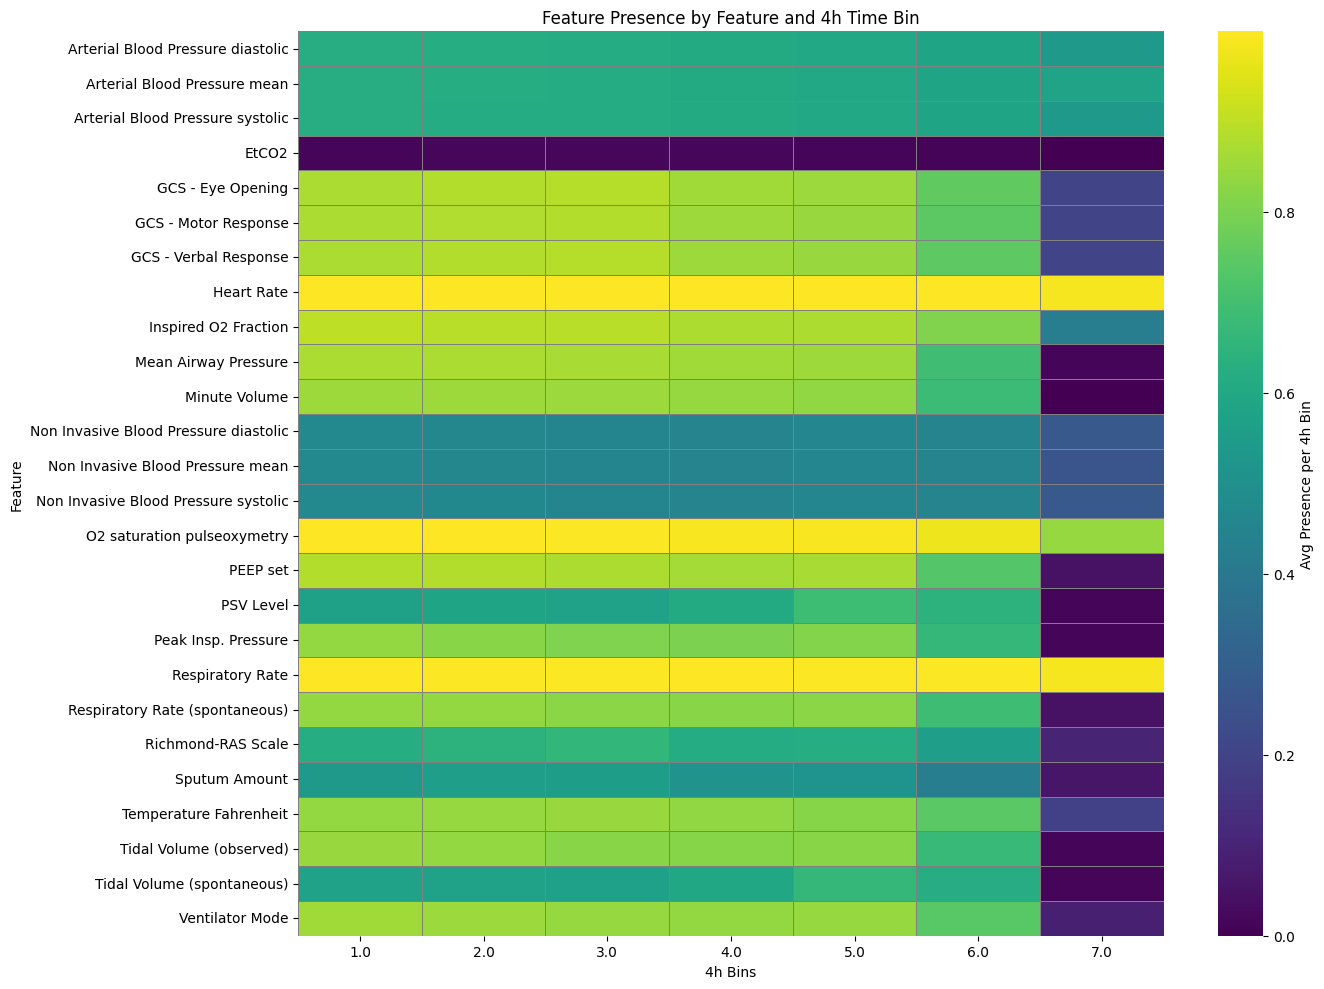

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
patient_stays = combined_train[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    combined_train[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 7)  # bins 1 to 7

# All unique itemids
all_itemids = combined_train['itemid'].unique()

# Precompute global median per itemid
global_medians = combined_train.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = combined_train[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = combined_train[
        (combined_train['subject_id'] == subject_id) &
        (combined_train['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
combined_filled_train = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
combined_filled_train.head()

,itemid,bin_4h,valuenum_normalized,charttime,label,subject_id,stay_id,ext_success
0,220045,1,0.536765,2156-04-21 18:00:00,Heart Rate,10002428,38875437,1
1,220045,2,0.490196,2156-04-21 22:00:00,Heart Rate,10002428,38875437,1
2,220045,3,0.475490,2156-04-22 02:00:00,Heart Rate,10002428,38875437,1
3,220045,4,0.482843,2156-04-22 06:00:00,Heart Rate,10002428,38875437,1
4,220045,5,0.504902,2156-04-22 10:00:00,Heart Rate,10002428,38875437,1


In [ ]:
nan_counts = combined_filled_train.isna().sum()
print(nan_counts)

itemid                 0
bin_4h                 0
valuenum_normalized    0
charttime              0
label                  0
subject_id             0
stay_id                0
ext_success            0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_filled_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_filled_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1,2,3,4,5,6
label,,,,,,
Arterial Blood Pressure diastolic,1.0,1.0,1.0,1.0,1.0,1.0
Arterial Blood Pressure mean,1.0,1.0,1.0,1.0,1.0,1.0
Arterial Blood Pressure systolic,1.0,1.0,1.0,1.0,1.0,1.0
EtCO2,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Eye Opening,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Motor Response,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Verbal Response,1.0,1.0,1.0,1.0,1.0,1.0
Heart Rate,1.0,1.0,1.0,1.0,1.0,1.0
Inspired O2 Fraction,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Creating 4h bins for universal time steps

# Sort
combined_test = combined_test.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
combined_test['window_start'] = combined_test.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
combined_test['hours_since_start'] = (combined_test['charttime'] - combined_test['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
combined_test['bin_4h'] = combined_test['hours_since_start'] // 4 +1

# Drop temp columns
combined_test = combined_test.drop(columns=['window_start', 'hours_since_start'])

# Preview
combined_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
301715,10004733,39635619,2174-12-06 19:30:00,220739,GCS - Eye Opening,0.4,1,1.0
301718,10004733,39635619,2174-12-06 23:00:00,220739,GCS - Eye Opening,0.4,1,2.0
301722,10004733,39635619,2174-12-07 03:00:00,220739,GCS - Eye Opening,0.4,1,3.0
301727,10004733,39635619,2174-12-07 08:00:00,220739,GCS - Eye Opening,0.4,1,4.0
301717,10004733,39635619,2174-12-06 19:30:00,223901,GCS - Motor Response,0.8,1,1.0


In [ ]:
nan_counts = combined_test.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1.0,2.0,3.0,4.0,5.0,6.0,7.0
label,,,,,,,
Arterial Blood Pressure diastolic,0.612225,0.608987,0.603629,0.600764,0.600382,0.589303,0.388889
Arterial Blood Pressure mean,0.614136,0.609943,0.604585,0.599809,0.600382,0.590258,0.444444
Arterial Blood Pressure systolic,0.612225,0.608987,0.603629,0.600764,0.600382,0.590258,0.388889
EtCO2,0.009551,0.010516,0.010506,0.012416,0.009560,0.004776,0.000000
GCS - Eye Opening,0.868195,0.855641,0.872015,0.859599,0.847992,0.748806,0.055556
GCS - Motor Response,0.862464,0.852772,0.872970,0.857689,0.843212,0.744986,0.055556
GCS - Verbal Response,0.864374,0.853728,0.874881,0.857689,0.845124,0.748806,0.055556
Heart Rate,0.997135,0.998088,0.999045,0.999045,0.999044,0.998090,0.944444
Inspired O2 Fraction,0.895893,0.897706,0.881566,0.882521,0.884321,0.818529,0.333333


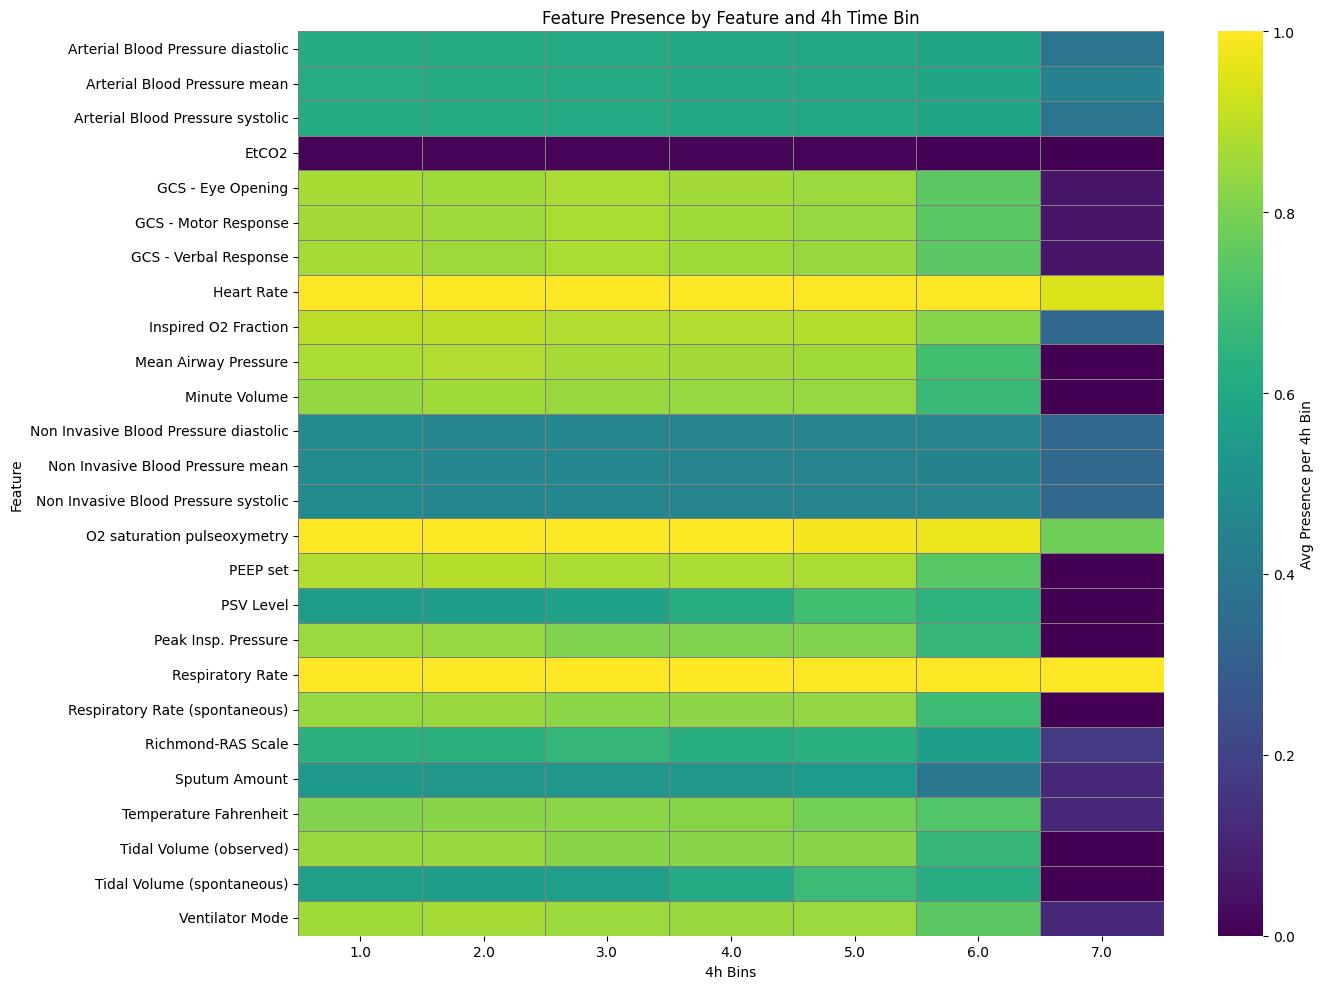

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
patient_stays = combined_test[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    combined_test[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 7)  # bins 1 to 7

# All unique itemids
all_itemids = combined_test['itemid'].unique()

# Precompute global median per itemid
global_medians = combined_test.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = combined_test[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = combined_test[
        (combined_test['subject_id'] == subject_id) &
        (combined_test['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
combined_filled_test = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
nan_counts = combined_filled_test.isna().sum()
print(nan_counts)

itemid                 0
bin_4h                 0
valuenum_normalized    0
charttime              0
label                  0
subject_id             0
stay_id                0
ext_success            0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_filled_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_filled_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1,2,3,4,5,6
label,,,,,,
Arterial Blood Pressure diastolic,1.0,1.0,1.0,1.0,1.0,1.0
Arterial Blood Pressure mean,1.0,1.0,1.0,1.0,1.0,1.0
Arterial Blood Pressure systolic,1.0,1.0,1.0,1.0,1.0,1.0
EtCO2,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Eye Opening,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Motor Response,1.0,1.0,1.0,1.0,1.0,1.0
GCS - Verbal Response,1.0,1.0,1.0,1.0,1.0,1.0
Heart Rate,1.0,1.0,1.0,1.0,1.0,1.0
Inspired O2 Fraction,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Since most of these samples are measured between 1-4 times per 24h period, I will divide into 6h bins for this feature set

# Ensure correct sort order
bloodgas_train = bloodgas_train.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Compute the start time per subject and stay
bloodgas_train['window_start'] = bloodgas_train.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours
bloodgas_train['hours_since_start'] = (bloodgas_train['charttime'] - bloodgas_train['window_start']).dt.total_seconds() / 3600

# Assign to 6-hour bins
bloodgas_train['bin_6h'] = (bloodgas_train['hours_since_start'] // 6 + 1).astype(int)

# Drop temp columns
bloodgas_train = bloodgas_train.drop(columns=['window_start', 'hours_since_start'])

In [ ]:
# Create a presence table: does itemid appear in each bin_6h per subject/stay?
presence = (
    bloodgas_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_6h'])
    .assign(present=1)
    .groupby(['label', 'bin_6h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_train[['subject_id', 'stay_id', 'bin_6h']]
    .drop_duplicates()
    .groupby('bin_6h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_6h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_6h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_6h,1,2,3,4
label,,,,
Base Excess,0.956423,0.955525,0.968750,0.965318
Lactate,0.473531,0.473245,0.429688,0.316474
pCO2,0.956746,0.956220,0.969531,0.966763
pH,0.982892,0.990966,0.992969,0.992775
pO2,0.956423,0.955525,0.969531,0.966763


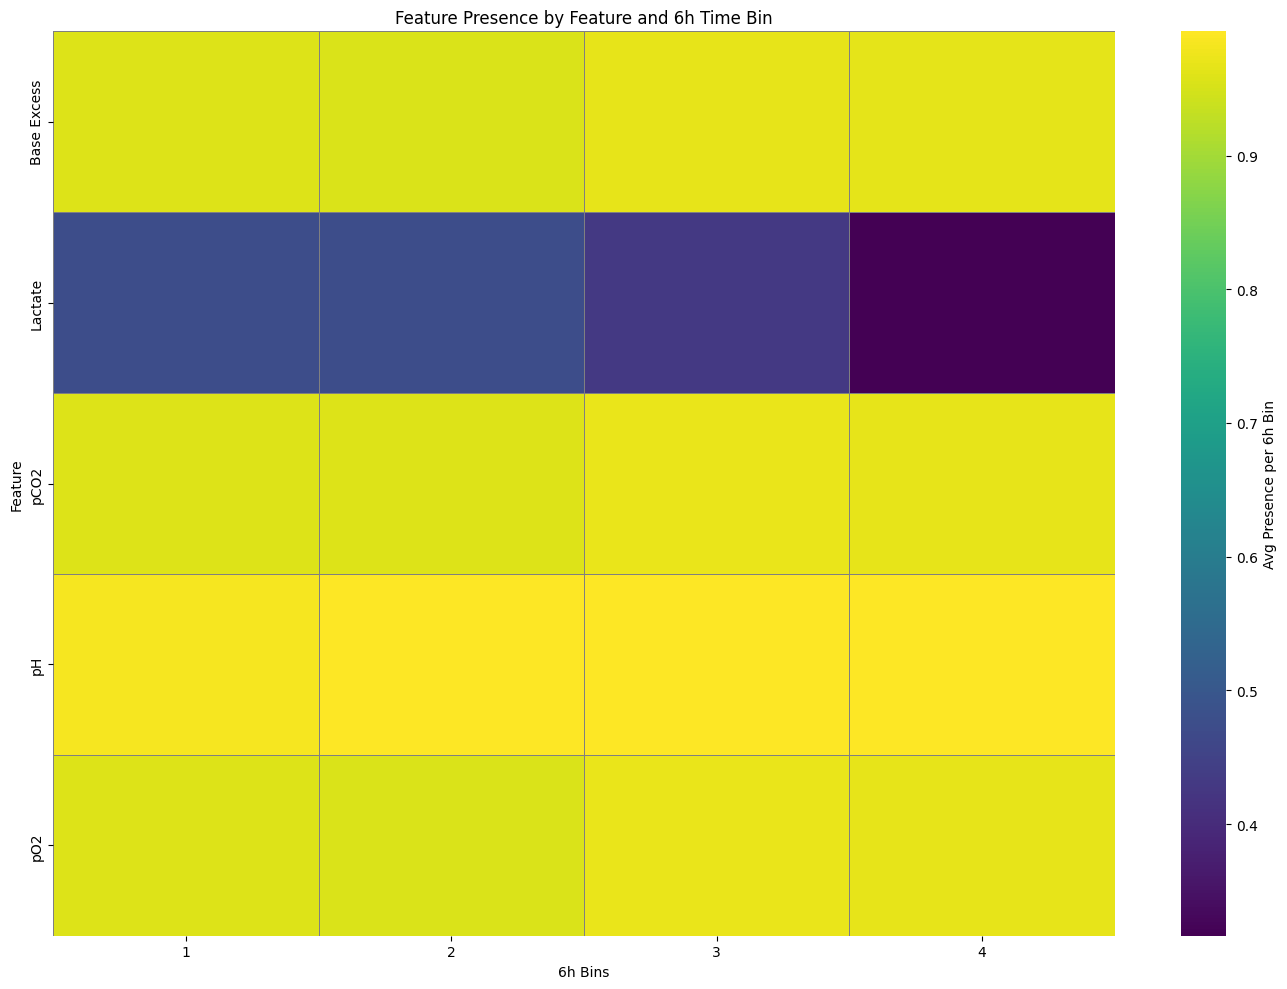

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 6h Bin'}
)

plt.title("Feature Presence by Feature and 6h Time Bin")
plt.xlabel("6h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
bloodgas_train1 = bloodgas_train.copy()

In [ ]:
patient_stays = bloodgas_train1[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    bloodgas_train1[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 5)  # bins 1 to 4

# All unique itemids
all_itemids = bloodgas_train1['itemid'].unique()

# Precompute global median per itemid
global_medians = bloodgas_train1.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = bloodgas_train1[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = bloodgas_train1[
        (bloodgas_train1['subject_id'] == subject_id) &
        (bloodgas_train1['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_6h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_6h']
    )

    agg = agg.set_index(['itemid', 'bin_6h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_6h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
bloodgas_filled_train = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_6h']
).reset_index(drop=True)

In [ ]:
# Create a presence table: does itemid appear in each bin_6h per subject/stay?
presence = (
    bloodgas_filled_train
    .drop_duplicates(subset=['subject_id', 'label', 'bin_6h'])
    .assign(present=1)
    .groupby(['label', 'bin_6h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_filled_train[['subject_id', 'bin_6h']]
    .drop_duplicates()
    .groupby('bin_6h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_6h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_6h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(15)

bin_6h,1,2,3,4
label,,,,
Base Excess,1.0,1.0,1.0,1.0
Lactate,1.0,1.0,1.0,1.0
pCO2,1.0,1.0,1.0,1.0
pH,1.0,1.0,1.0,1.0
pO2,1.0,1.0,1.0,1.0


In [ ]:
# Since most of these samples are measured between 1-4 times per 24h period, I will divide into 6h bins for this feature set

# Ensure correct sort order
bloodgas_test = bloodgas_test.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Compute the start time per subject and stay
bloodgas_test['window_start'] = bloodgas_test.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours
bloodgas_test['hours_since_start'] = (bloodgas_test['charttime'] - bloodgas_test['window_start']).dt.total_seconds() / 3600

# Assign to 6-hour bins
bloodgas_test['bin_6h'] = (bloodgas_test['hours_since_start'] // 6 + 1).astype(int)

# Drop temp columns
bloodgas_test = bloodgas_test.drop(columns=['window_start', 'hours_since_start'])

In [ ]:
# Create a presence table: does itemid appear in each bin_6h per subject/stay?
presence = (
    bloodgas_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_6h'])
    .assign(present=1)
    .groupby(['label', 'bin_6h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_test[['subject_id', 'stay_id', 'bin_6h']]
    .drop_duplicates()
    .groupby('bin_6h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_6h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_6h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_6h,1,2,3,4
label,,,,
Base Excess,0.949174,0.954660,0.965318,0.978947
Lactate,0.485388,0.481108,0.462428,0.342105
pCO2,0.949174,0.957179,0.965318,0.978947
pH,0.988564,0.992443,0.991329,0.994737
pO2,0.947903,0.957179,0.968208,0.978947


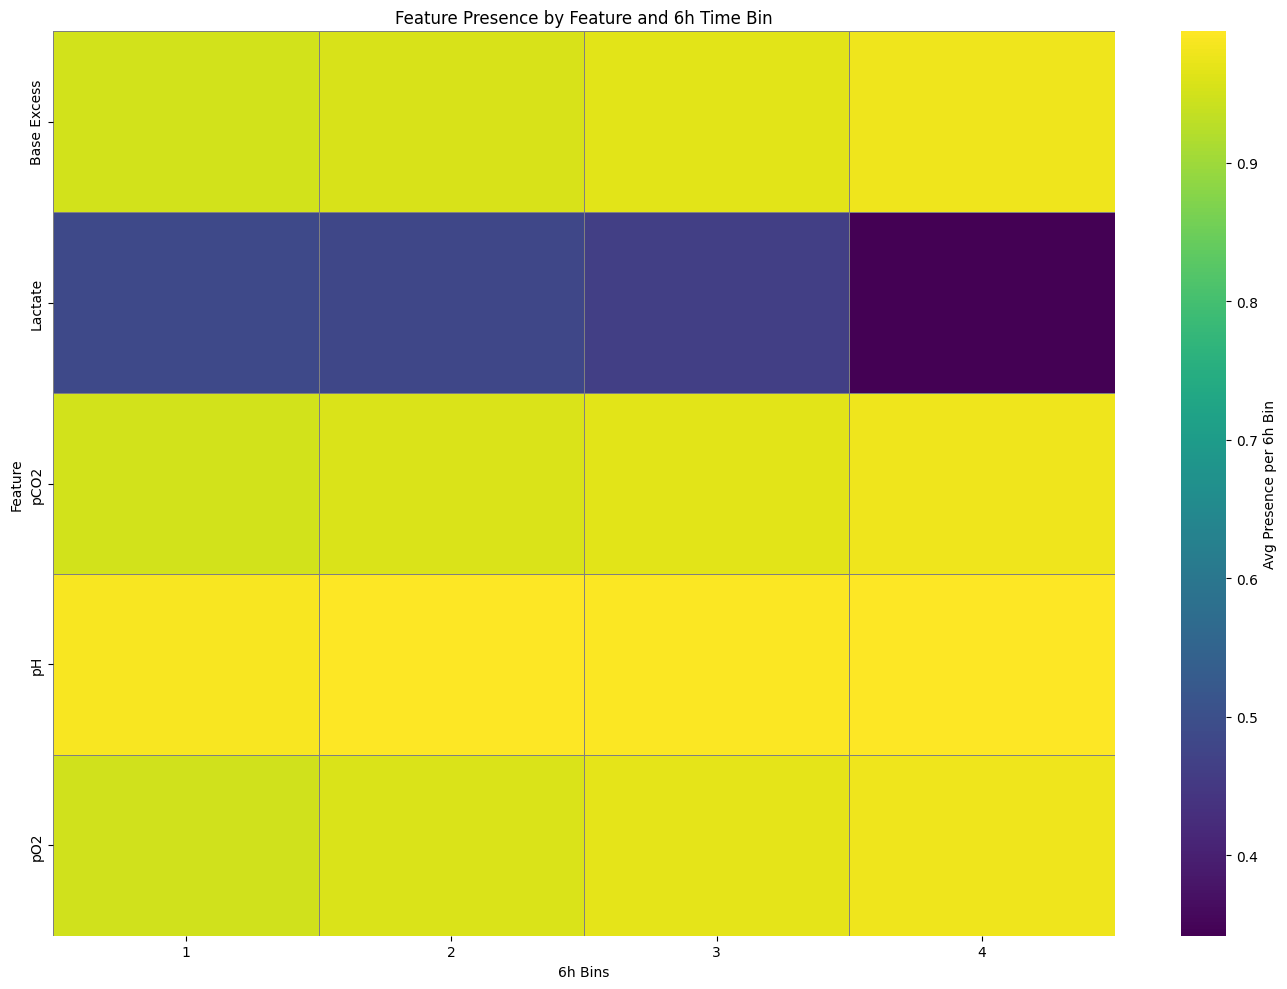

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 6h Bin'}
)

plt.title("Feature Presence by Feature and 6h Time Bin")
plt.xlabel("6h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
bloodgas_test1 = bloodgas_test.copy()

In [ ]:
patient_stays = bloodgas_test1[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    bloodgas_test1[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 5)  # bins 1 to 4

# All unique itemids
all_itemids = bloodgas_test1['itemid'].unique()

# Precompute global median per itemid
global_medians = bloodgas_test1.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = bloodgas_test1[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = bloodgas_test1[
        (bloodgas_test1['subject_id'] == subject_id) &
        (bloodgas_test1['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_6h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_6h']
    )

    agg = agg.set_index(['itemid', 'bin_6h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_6h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
bloodgas_filled_test = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_6h']
).reset_index(drop=True)

In [ ]:
# Create a presence table: does itemid appear in each bin_6h per subject/stay?
presence = (
    bloodgas_filled_test
    .drop_duplicates(subset=['subject_id', 'label', 'bin_6h'])
    .assign(present=1)
    .groupby(['label', 'bin_6h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_filled_test[['subject_id', 'bin_6h']]
    .drop_duplicates()
    .groupby('bin_6h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_6h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_6h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(15)

bin_6h,1,2,3,4
label,,,,
Base Excess,1.0,1.0,1.0,1.0
Lactate,1.0,1.0,1.0,1.0
pCO2,1.0,1.0,1.0,1.0
pH,1.0,1.0,1.0,1.0
pO2,1.0,1.0,1.0,1.0


In [ ]:
bloodgas_filled_test.head()

,itemid,bin_6h,valuenum_normalized,charttime,label,subject_id,stay_id,ext_success
0,50802,1,0.680000,2135-01-19 11:32:00,Base Excess,10005817,31316840,0
1,50802,2,0.680000,2135-01-19 17:32:00,Base Excess,10005817,31316840,0
2,50802,3,0.680000,2135-01-19 21:32:00,Base Excess,10005817,31316840,0
3,50802,4,0.680000,2135-01-20 01:32:00,Base Excess,10005817,31316840,0
4,50813,1,0.046512,2135-01-19 12:50:00,Lactate,10005817,31316840,0


In [ ]:
# For FB - once per patient stay

presence = (
    fb_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    fb_train[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head()

,label,present,presence_rate
0,Fluid balance,4110,1.0


In [ ]:
presence = (
    fb_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    fb_test[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head()

,label,present,presence_rate
0,Fluid balance,1036,1.0


In [ ]:
# For labs

presence = (
    lab_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    lab_test[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head(20)

,label,present,presence_rate
0,Alanine Aminotransferase (ALT),314,0.313686
1,Albumin,193,0.192807
2,Alkaline Phosphatase,332,0.331668
3,"Bilirubin, Total",249,0.248751
4,C-Reactive Protein,9,0.008991
5,"Calcium, Total",964,0.963037
6,Creatinine,988,0.987013
7,Eosinophils,118,0.117882
8,Hematocrit,996,0.995005
9,INR(PT),673,0.672328


In [ ]:
# Remove features that appear < 0.6/ 24h period

lab_train = lab_train[
    ~lab_train['label'].isin(['Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphatase', 'Bilirubin, Total', 'C-Reactive Protein', 'Eosinophils', 'Neutrophils'])
]

lab_test = lab_test[
    ~lab_test['label'].isin(['Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphatase', 'Bilirubin, Total', 'C-Reactive Protein', 'Eosinophils', 'Neutrophils'])
]

In [ ]:
# Use median value/ ff/ bf/ median of whole dataframe to ensure one value per itemid per subject_id and stay_id combination

# Aggregate using median
lab_agg = (
    lab_train
    .groupby(['subject_id', 'stay_id', 'label'])['valuenum_normalized']
    .median()
    .reset_index()
)

# Pivot so each label becomes a column
lab_pivot = lab_agg.pivot(index=['subject_id', 'stay_id'], columns='label', values='valuenum_normalized')

# Fill missing values
# Forward fill across subjects
lab_pivot = lab_pivot.sort_index().groupby(level=0).ffill()

# Backward fill across subjects
lab_pivot = lab_pivot.groupby(level=0).bfill()

# Fill remaining NaNs with overall median of each column
lab_pivot = lab_pivot.fillna(lab_pivot.median())

# Reset column names (flatten MultiIndex)
lab_pivot.columns.name = None
lab_pivot = lab_pivot.reset_index()
lab_train1 = lab_pivot
lab_train1.head()

,subject_id,stay_id,"Calcium, Total",Creatinine,Hematocrit,INR(PT),Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells
0,10002428,38875437,0.221053,0.026316,0.268844,0.056818,0.411765,0.126521,0.225284,0.30,0.116615,0.254545,0.543103,0.458333,0.131195
1,10004235,34100191,0.252632,0.243421,0.399497,0.034091,0.529412,0.075426,0.089141,0.26,0.023736,0.309091,0.353448,0.812500,0.223032
2,10013643,33072499,0.252632,0.072368,0.580402,0.045455,0.558824,0.094891,0.228525,0.85,0.192982,0.272727,0.482759,0.395833,0.256560
3,10014078,38907302,0.168421,0.026316,0.331658,0.056818,0.441176,0.126521,0.225284,0.22,0.162023,0.227273,0.517241,0.062500,0.106414
4,10015931,37093652,0.168421,0.526316,0.138191,0.034091,0.470588,0.085158,0.226904,0.36,0.067595,0.145455,0.603448,0.375000,0.135569


In [ ]:
# Use median value/ ff/ bf/ median of whole dataframe to ensure one value per itemid per subject_id and stay_id combination

# Aggregate using median
lab_agg = (
    lab_test
    .groupby(['subject_id', 'stay_id', 'label'])['valuenum_normalized']
    .median()
    .reset_index()
)

# Pivot so each label becomes a column
lab_pivot = lab_agg.pivot(index=['subject_id', 'stay_id'], columns='label', values='valuenum_normalized')

# Fill missing values
# Forward fill across subjects
lab_pivot = lab_pivot.sort_index().groupby(level=0).ffill()

# Backward fill across subjects
lab_pivot = lab_pivot.groupby(level=0).bfill()

# Fill remaining NaNs with overall median of each column
lab_pivot = lab_pivot.fillna(lab_pivot.median())

# Reset column names (flatten MultiIndex)
lab_pivot.columns.name = None
lab_pivot = lab_pivot.reset_index()
lab_test1 = lab_pivot
lab_test1.head()

,subject_id,stay_id,"Calcium, Total",Creatinine,Hematocrit,INR(PT),Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells
0,10004733,39635619,0.347368,0.447368,0.340452,0.045455,0.411765,0.096107,0.240681,0.72,0.185759,0.318182,0.577586,0.760417,0.101312
1,10005817,31316840,0.157895,0.328947,0.267588,0.045455,0.382353,0.090024,0.599676,0.96,0.147575,0.272727,0.344828,0.390625,0.151603
2,10006053,32895909,0.273684,0.282895,0.201005,0.193182,0.411765,0.428224,0.254457,0.79,0.022704,0.454545,0.586207,0.416667,0.201166
3,10017285,35690782,0.305263,0.039474,0.336683,0.056818,0.441176,0.126521,0.226904,0.36,0.235294,0.272727,0.568966,0.104167,0.164723
4,10032381,34622731,0.294737,0.118421,0.231156,0.056818,0.441176,0.126521,0.226904,0.54,0.485036,0.345455,0.500000,0.541667,0.208455


In [ ]:
uploaded = files.upload()

Saving chartevents_demographics.csv to chartevents_demographics.csv


In [ ]:
demographics = pd.read_csv("chartevents_demographics.csv")
demographics = demographics.drop_duplicates(subset=['subject_id', 'stay_id', 'itemid'])
demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0
2,10004235,34100191,2196-02-24 14:39:00,226730,183.0,183.0
3,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1
4,10004401,39699336,2144-06-05 19:46:00,226730,170.0,170.0


In [ ]:
label_map = {
    226512: 'Weight',
    226730: 'Height',
    226228: 'Gender'
}

# Add 'label' column based on itemid
demographics['label'] = demographics['itemid'].map(label_map)

In [ ]:
demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0,Weight
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0,Weight
2,10004235,34100191,2196-02-24 14:39:00,226730,183.0,183.0,Height
3,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1,Weight
4,10004401,39699336,2144-06-05 19:46:00,226730,170.0,170.0,Height


In [ ]:
# Check for outliers in the dataframe

summary_stats = demographics.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

summary_stats

,itemid,min_value,max_value,median_value
0,226512,1.0,710.0,80.0
1,226730,0.0,445.0,170.0


In [ ]:
# Define valid ranges for specific itemids
valid_ranges = {
    226512: (30, 200),
    226730: (70, 220)
}

to_filter = demographics[demographics['itemid'].isin(valid_ranges.keys())].copy()

# Apply physiological range filtering to the filtered subset
def in_valid_range(row):
    low, high = valid_ranges[row['itemid']]
    return low <= row['valuenum'] <= high

demographics = to_filter[to_filter.apply(in_valid_range, axis=1)]

In [ ]:
# Normalise each value using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

# Create an empty list to hold the normalized data
normalized_frames = []

# Loop through each itemid and normalize valuenum within its group
for itemid, group in demographics.groupby('itemid'):
    scaler = MinMaxScaler()
    group = group.copy()  # avoid SettingWithCopyWarning
    group['valuenum_normalized'] = scaler.fit_transform(group[['valuenum']])
    normalized_frames.append(group)

# Concatenate all normalized groups back together
demographics = pd.concat(normalized_frames, ignore_index=True)

demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,valuenum_normalized
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0,Weight,0.064967
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0,Weight,0.574985
2,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1,Weight,0.326655
3,10004733,39635619,2174-12-04 11:28:00,226512,112.5,112.5,Weight,0.486946
4,10005817,31316840,2135-01-03 21:55:00,226512,88.8,88.8,Weight,0.343048


In [ ]:
demographics1 = demographics[demographics['label'].isin(['Height', 'Weight'])].copy()

# Pivot so each subject_id/stay_id has columns for Height and Weight
demographics1 = demographics1.pivot_table(
    index=['subject_id', 'stay_id'],
    columns='label',
    values='valuenum_normalized',
    aggfunc='first'     # in case of duplicates, take the first value
).reset_index()

# Flatten column index
demographics1.columns.name = None

In [ ]:
demographics1.head()

,subject_id,stay_id,Height,Weight
0,10002428,38875437,NaN,0.064967
1,10004235,34100191,0.849624,0.574985
2,10004401,39699336,0.751880,0.326655
3,10004733,39635619,0.827068,0.486946
4,10005817,31316840,0.789474,0.343048


In [ ]:
# Pivot combined_filled_train: one feature per 4h bin
combined_pivot = (
    combined_filled_train
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_4h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
combined_pivot.columns = [f"{label}_bin{int(bin_)}" for label, bin_ in combined_pivot.columns]
combined_pivot = combined_pivot.reset_index()

In [ ]:
# Pivot bloodgas_filled_train: one feature per 6h bin
bloodgas_pivot = (
    bloodgas_filled_train
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_6h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
bloodgas_pivot.columns = [f"{label}_bin6h{int(bin_)}" for label, bin_ in bloodgas_pivot.columns]
bloodgas_pivot = bloodgas_pivot.reset_index()

In [ ]:
# Merge both pivoted frames on subject_id and stay_id
merged_features = pd.merge(combined_pivot, bloodgas_pivot, on=['subject_id', 'stay_id'], how='outer')

In [ ]:
merged_features = pd.merge(merged_features, fb_train[['subject_id', 'stay_id', 'valuenum_normalized']],
                           on=['subject_id', 'stay_id'], how='left')

In [ ]:
merged_features = pd.merge(
    merged_features,
    lab_train1,  # Already pivoted
    on=['subject_id', 'stay_id'],
    how='left'
)

In [ ]:
merged_features = pd.merge(
    merged_features,
    demographics1,
    on=['subject_id', 'stay_id'],
    how='inner'
)

In [ ]:
# Extract unique labels (make sure ext_success is included)
labels = combined_filled_train[['subject_id', 'stay_id', 'ext_success']].drop_duplicates(subset=['subject_id', 'stay_id'])

# Merge labels into final feature frame
final_train = merged_features.merge(labels, on=['subject_id', 'stay_id'], how='left')

In [ ]:
final_train.head()

,subject_id,stay_id,Arterial Blood Pressure diastolic_bin1,Arterial Blood Pressure diastolic_bin2,Arterial Blood Pressure diastolic_bin3,Arterial Blood Pressure diastolic_bin4,Arterial Blood Pressure diastolic_bin5,Arterial Blood Pressure diastolic_bin6,Arterial Blood Pressure mean_bin1,Arterial Blood Pressure mean_bin2,...,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells,Height,Weight,ext_success
0,10002428,38875437,0.2750,0.2600,0.2575,0.3175,0.3300,0.2800,0.3625,0.330,...,0.225284,0.30,0.116615,0.254545,0.543103,0.458333,0.131195,NaN,0.064967,1
1,10004235,34100191,0.2850,0.2850,0.2850,0.2850,0.2850,0.2850,0.3850,0.385,...,0.089141,0.26,0.023736,0.309091,0.353448,0.812500,0.223032,0.849624,0.574985,1
2,10004401,39699336,0.2850,0.2850,0.2850,0.2850,0.2850,0.2850,0.3850,0.385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751880,0.326655,0
3,10013643,33072499,0.2525,0.2800,0.2800,0.2900,0.3150,0.3000,0.3325,0.370,...,0.228525,0.85,0.192982,0.272727,0.482759,0.395833,0.256560,NaN,0.207043,1
4,10014078,38907302,0.2925,0.2675,0.3200,0.2500,0.2225,0.2225,0.3875,0.350,...,0.225284,0.22,0.162023,0.227273,0.517241,0.062500,0.106414,NaN,0.125683,1


In [ ]:
final_train.shape

(4430, 195)

In [ ]:
# Pivot combined_filled_test: one feature per 4h bin
combined_pivot = (
    combined_filled_test
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_4h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
combined_pivot.columns = [f"{label}_bin{int(bin_)}" for label, bin_ in combined_pivot.columns]
combined_pivot = combined_pivot.reset_index()

In [ ]:
# Pivot bloodgas_filled_test: one feature per 6h bin
bloodgas_pivot = (
    bloodgas_filled_test
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_6h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
bloodgas_pivot.columns = [f"{label}_bin6h{int(bin_)}" for label, bin_ in bloodgas_pivot.columns]
bloodgas_pivot = bloodgas_pivot.reset_index()

In [ ]:
# Merge both pivoted frames on subject_id and stay_id
merged_features = pd.merge(combined_pivot, bloodgas_pivot, on=['subject_id', 'stay_id'], how='outer')

In [ ]:
merged_features = pd.merge(merged_features, fb_test[['subject_id', 'stay_id', 'valuenum_normalized']],
                           on=['subject_id', 'stay_id'], how='left')

In [ ]:
merged_features = pd.merge(
    merged_features,
    lab_test1,  # Already pivoted
    on=['subject_id', 'stay_id'],
    how='left'
)

In [ ]:
merged_features = pd.merge(
    merged_features,
    demographics1,
    on=['subject_id', 'stay_id'],
    how='inner'
)

In [ ]:
# Extract unique labels (make sure ext_success is included)
labels = combined_filled_test[['subject_id', 'stay_id', 'ext_success']].drop_duplicates(subset=['subject_id', 'stay_id'])

# Merge labels into final feature frame
final_test = merged_features.merge(labels, on=['subject_id', 'stay_id'], how='left')

In [ ]:
final_test.head()

,subject_id,stay_id,Arterial Blood Pressure diastolic_bin1,Arterial Blood Pressure diastolic_bin2,Arterial Blood Pressure diastolic_bin3,Arterial Blood Pressure diastolic_bin4,Arterial Blood Pressure diastolic_bin5,Arterial Blood Pressure diastolic_bin6,Arterial Blood Pressure mean_bin1,Arterial Blood Pressure mean_bin2,...,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells,Height,Weight,ext_success
0,10004733,39635619,0.28,0.280,0.2800,0.2800,0.2800,0.280,0.380,0.380,...,0.240681,0.72,0.185759,0.318182,0.577586,0.760417,0.101312,0.827068,0.486946,1
1,10005817,31316840,0.21,0.265,0.2625,0.2800,0.2725,0.160,0.355,0.475,...,0.599676,0.96,0.147575,0.272727,0.344828,0.390625,0.151603,0.789474,0.343048,0
2,10006053,32895909,0.28,0.280,0.2800,0.2800,0.2800,0.280,0.380,0.380,...,0.254457,0.79,0.022704,0.454545,0.586207,0.416667,0.201166,0.000000,0.392835,0
3,10017285,35690782,0.28,0.280,0.2800,0.2800,0.2800,0.280,0.380,0.380,...,0.226904,0.36,0.235294,0.272727,0.568966,0.104167,0.164723,0.736842,0.261688,1
4,10032381,34622731,0.42,0.355,0.3350,0.3475,0.4000,0.395,0.570,0.495,...,0.226904,0.54,0.485036,0.345455,0.500000,0.541667,0.208455,0.639098,0.277474,1


In [ ]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Train XBG model

# Copy pivoted training features
X_train = final_train.set_index(['subject_id', 'stay_id']).copy()
y_train = X_train['ext_success']

# Drop target from features
X_train = X_train.drop(columns=['ext_success'])

# --- Same for test set ---
X_test = final_test.set_index(['subject_id', 'stay_id']).copy()
y_test = X_test['ext_success']
X_test = X_test.drop(columns=['ext_success'])

In [ ]:
from collections import Counter

class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  # minority / majority

# Define hyperparameter grid
xgb_params = {
    'n_estimators': [6, 7, 8],
    'max_depth': [3, 4, 5],
    'min_child_weight': list(range(1, 3)),
    'learning_rate': [0.1, 0.2, 0.25],
    'gamma': [0, 0.7, 0.8, 0.9],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [1e-5, 0.01, 0.015, 0.02, 0.03],
    'base_score': [0.5, 0.6],
    'booster': ['gbtree'],
    'objective': ['binary:logistic'],
    'seed': [27],
    'scale_pos_weight': [scale_pos_weight]  # must be list for GridSearch
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=xgb_params,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:03:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                        'booster': ['gbtree'],
                                        'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.7, 0.8, 0.9],
                                        'learning_rate': [0.1, 0.2, 0.25],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [6, 7, 8],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [1e-05, 0.01, 0.015, 0.02,
                                                      0.03],
                                        'scale_pos_weight': [0.3129816241849437],
                                        'seed': [27],
                                        'subsample': [0.6, 0.7, 0.8]},
                   scoring='roc_auc', verbose=1)

In [ ]:
best_model = random_search.best_estimator_

print("Train Accuracy {:.2f}%".format(best_model.score(X_train, y_train) * 100))
print("Test Accuracy {:.2f}%".format(best_model.score(X_test, y_test) * 100))

Train Accuracy 89.50%
Test Accuracy 81.95%


In [ ]:
predict = best_model.predict(X_test)

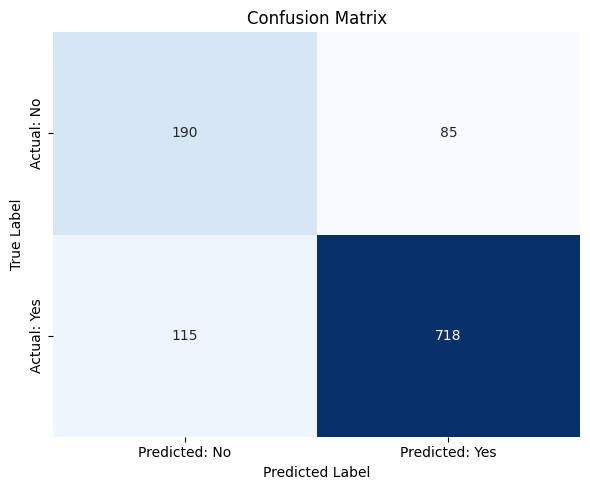

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

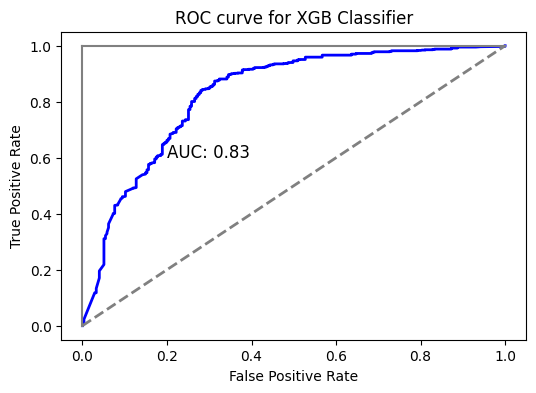

In [ ]:
# ROC Curve for XGB Classifier

y_probabilities = best_model.predict_proba(X_test)[:,1]

false_positive_rate_xgb, true_positive_rate_xgb, threshold_xgb = roc_curve(y_test,y_probabilities)

xgb_AUC = roc_auc_score(y_test,y_probabilities)

#Plotting ROC Curve
plt.figure(figsize=(6,4))
plt.title('ROC curve for XGB Classifier')
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, linewidth=2, color='blue')
plt.plot([0,1],ls='--',linewidth=2, color='gray')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')

plt.text(0.2,0.6,'AUC: {:.2f}'.format(xgb_AUC),size= 12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

/tmp/ipython-input-131-4220956554.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)
/tmp/ipython-input-131-4220956554.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)


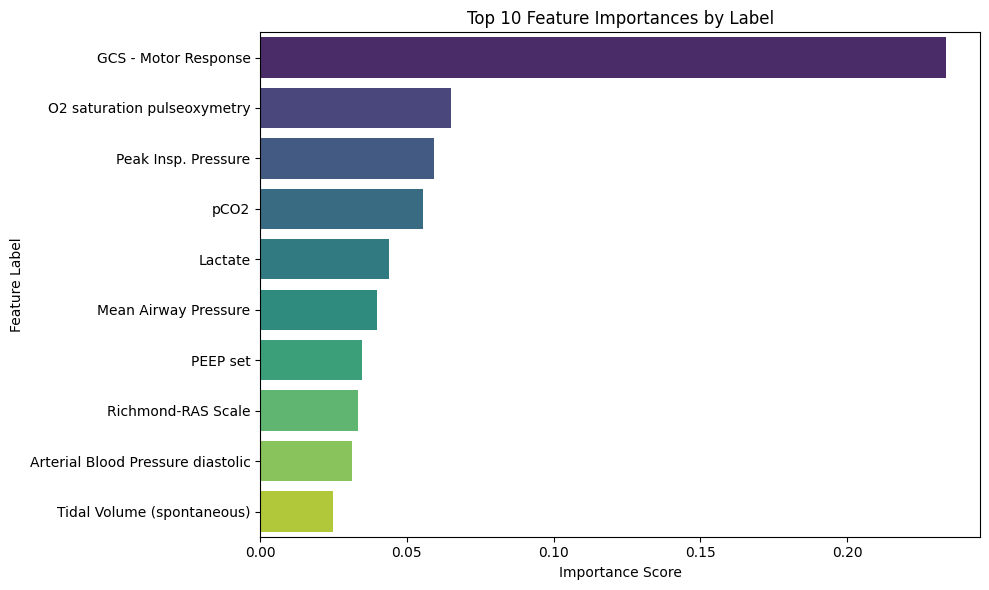

In [ ]:
# Get feature importances (as a Series for easy sorting)
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Reset to DataFrame for processing
importances_df = importances.reset_index()
importances_df.columns = ['feature', 'importance']

# Extract label (e.g., strip '_binX' or similar suffixes)
importances_df['label'] = importances_df['feature'].apply(lambda x: x.split('_bin')[0])

# Group by label and sum importances
label_importances = importances_df.groupby('label', as_index=False)['importance'].sum()

# Sort and take top 10
top_features_df = label_importances.sort_values(by='importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)
plt.title('Top 10 Feature Importances by Label')
plt.xlabel('Importance Score')
plt.ylabel('Feature Label')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
)

# Get predicted labels (0 or 1)
y_pred = best_model.predict(X_test)

# Confusion matrix: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity / Recall / True Positive Rate
sensitivity = recall_score(y_test, y_pred)

# Specificity = TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# Precision = TP / (TP + FP)
precision = precision_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Sensitivity (Recall): 0.862
Specificity: 0.691
Precision: 0.894
F1 Score: 0.878
Accuracy: 0.819
